In [3]:
import pandas as pd 
import requests 
!pip install bs4
from bs4 import BeautifulSoup

import numpy as np
import matplotlib.pyplot as plt
print("Libraries imported")

     |████████████████████████████████| 122kB 20.6MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Libraries imported


In [4]:
CLIENT_ID = 'IBWZ24XZ3ZFYNIKKUMPGMWHM05BZDQNU3L2ORSJPSUSHZBAZ' # your Foursquare ID
CLIENT_SECRET = 'K5QIXCMSVEL4KGRF2F2XPOMXPREUX5CCK0GAITLWRAMOUFYA' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IBWZ24XZ3ZFYNIKKUMPGMWHM05BZDQNU3L2ORSJPSUSHZBAZ
CLIENT_SECRET:K5QIXCMSVEL4KGRF2F2XPOMXPREUX5CCK0GAITLWRAMOUFYA


In [5]:
#Randwick Major Crime Dataframe
df_randwick_crime = pd.read_csv("https://raw.githubusercontent.com/FeygaLiu/Coursera_Capstone/main/Randwick_Crime_CSV.csv")
df_randwick_crime = df_randwick_crime[df_randwick_crime['Unnamed: 0'] == "major offences"]
df_randwick_crime.reset_index(inplace = True, drop = True)
df_randwick_crime.drop(columns = ['Unnamed: 0', 'Unnamed: 3','Unnamed: 5','Unnamed: 7','Unnamed: 9','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14'], inplace = True)
df_randwick_crime.rename(columns={'Unnamed: 1':'Subject','Jan-Dec 2016': '2016','Jan-Dec 2017': '2017','Jan-Dec 2018': '2018','Jan-Dec 2019': '2019','Jan-Dec 2020': '2020'}, inplace = True)
df_randwick_crime['2016'] = df_randwick_crime['2016'].str.replace(',', '').astype('int')
df_randwick_crime['2017'] = df_randwick_crime['2017'].str.replace(',', '').astype('int')
df_randwick_crime['2018'] = df_randwick_crime['2018'].str.replace(',', '').astype('int')
df_randwick_crime['2019'] = df_randwick_crime['2019'].str.replace(',', '').astype('int')
df_randwick_crime['2020'] = df_randwick_crime['2020'].str.replace(',', '').astype('int')

#Group Number of Crimes by Subject
df_randwick_crime.loc[(df_randwick_crime['Subject'].str.contains('Murder')),'Subject']='Murder'
df_randwick_crime.loc[(df_randwick_crime['Subject'].str.contains('assault')),'Subject']='Assault'
df_randwick_crime.loc[(df_randwick_crime['Subject'].str.contains('Robbery')),'Subject']='Robbery'
df_randwick_crime.loc[(df_randwick_crime['Subject'].str.contains('Break')),'Subject']='Break'
df_randwick_crime.loc[(df_randwick_crime['Subject'].str.contains('Steal')),'Subject']='Steal'
df_randwick_crime.loc[(df_randwick_crime['Subject'].str.contains('theft')),'Subject']='Steal'
df_randwick_crime.loc[(df_randwick_crime['Subject'].str.contains('damage')),'Subject']='Damage'
df_randwick_crime = df_randwick_crime.groupby(['Subject']).sum()
df_randwick_crime

,2016,2017,2018,2019,2020
Subject,,,,,
Assault,1019,1035,1092,1191,1051
Break,476,471,406,407,275
Damage,730,719,786,728,640
Fraud,1007,997,996,924,871
Murder,1,2,0,1,2
Robbery,47,54,30,32,29
Steal,1531,1380,1391,1246,1015


In [6]:
#Sydney CBD Major Crime Dataframe
df_sydney_crime = pd.read_csv("https://raw.githubusercontent.com/FeygaLiu/Coursera_Capstone/main/Sydney_Crime_CSV.csv")
df_sydney_crime = df_sydney_crime[df_sydney_crime['NSW Recorded Crime Statistics 2016 - 2020'] == "major offences"]
df_sydney_crime.reset_index(inplace = True, drop = True)
df_sydney_crime.drop(columns = ['Definitions and explanations','Unnamed: 5','Unnamed: 7','Unnamed: 9','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14'], inplace = True)
df_sydney_crime.rename(columns={'Unnamed: 1':'Subject','Unnamed: 4': '2016','Unnamed: 6': '2017','Unnamed: 8': '2018','Unnamed: 10': '2019'}, inplace = True)
df_sydney_crime = df_sydney_crime[['Subject','2016','2017','2018','2019','2020']]
df_sydney_crime['2016'] = df_sydney_crime['2016'].str.replace(',', '').astype('int')
df_sydney_crime['2017'] = df_sydney_crime['2017'].str.replace(',', '').astype('int')
df_sydney_crime['2018'] = df_sydney_crime['2018'].str.replace(',', '').astype('int')
df_sydney_crime['2019'] = df_sydney_crime['2019'].str.replace(',', '').astype('int')
df_sydney_crime['2020'] = df_sydney_crime['2020'].str.replace(',', '').astype('int')

#Group Number of Crimes by Subject
df_sydney_crime.loc[(df_sydney_crime['Subject'].str.contains('Murder')),'Subject']='Murder'
df_sydney_crime.loc[(df_sydney_crime['Subject'].str.contains('assault')),'Subject']='Assault'
df_sydney_crime.loc[(df_sydney_crime['Subject'].str.contains('Robbery')),'Subject']='Robbery'
df_sydney_crime.loc[(df_sydney_crime['Subject'].str.contains('Break')),'Subject']='Break'
df_sydney_crime.loc[(df_sydney_crime['Subject'].str.contains('Steal')),'Subject']='Steal'
df_sydney_crime.loc[(df_sydney_crime['Subject'].str.contains('theft')),'Subject']='Steal'
df_sydney_crime.loc[(df_sydney_crime['Subject'].str.contains('damage')),'Subject']='Damage'
df_sydney_crime = df_sydney_crime.groupby(['Subject']).sum()
df_sydney_crime

,2016,2017,2018,2019,2020
Subject,,,,,
Assault,4997,4976,5104,3978,4816
Break,1290,1265,1241,863,1400
Damage,2490,2720,2524,2055,2746
Fraud,4667,4427,4021,2785,5647
Murder,1,4,5,3,4
Robbery,277,284,259,165,263
Steal,6828,6716,6439,4337,7038


In [7]:
#Calculate The Total Crimes In Each Year for Ranwick Dataframes
df_randwick_crime.loc['Year Total']= df_randwick_crime.sum(axis=0)
df_randwick_crime

,2016,2017,2018,2019,2020
Subject,,,,,
Assault,1019,1035,1092,1191,1051
Break,476,471,406,407,275
Damage,730,719,786,728,640
Fraud,1007,997,996,924,871
Murder,1,2,0,1,2
Robbery,47,54,30,32,29
Steal,1531,1380,1391,1246,1015
Year Total,4811,4658,4701,4529,3883


In [8]:
#Calculate The Total Crimes In Each Year for Sydney Dataframes
df_sydney_crime.loc['Year Total']= df_sydney_crime.sum(axis=0)
df_sydney_crime

,2016,2017,2018,2019,2020
Subject,,,,,
Assault,4997,4976,5104,3978,4816
Break,1290,1265,1241,863,1400
Damage,2490,2720,2524,2055,2746
Fraud,4667,4427,4021,2785,5647
Murder,1,4,5,3,4
Robbery,277,284,259,165,263
Steal,6828,6716,6439,4337,7038
Year Total,20550,20392,19593,14186,21914


In [9]:
#Compare Crime Rate Between Randwick and Sydney CBD
df_randwick_transposed = df_randwick_crime.T
randwick_com = df_randwick_transposed['Year Total'].tolist()
df_sydney_transposed = df_sydney_crime.T
sydney_com = df_sydney_transposed['Year Total'].tolist()

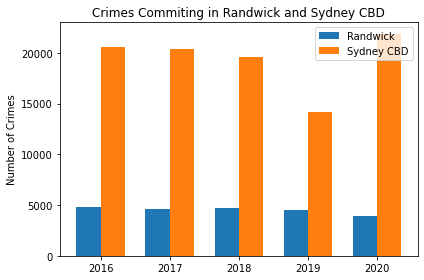

In [10]:
labels = ['2016', '2017', '2018', '2019', '2020']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, randwick_com, width, label='Randwick')
rects2 = ax.bar(x + width/2, sydney_com, width, label='Sydney CBD')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Crimes')
ax.set_title('Crimes Commiting in Randwick and Sydney CBD')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [11]:
#Figure out the unit sold price in both suburbs
unit_price = pd.read_csv("https://raw.githubusercontent.com/FeygaLiu/Coursera_Capstone/main/Real_Estate.csv")
unit_price.rename(columns={'Unnamed: 0':'Suburb'}, inplace = True)
unit_price['2012'] = unit_price['2012'].str.replace(',', '').astype('int')
unit_price['2013'] = unit_price['2013'].str.replace(',', '').astype('int')
unit_price['2014'] = unit_price['2014'].str.replace(',', '').astype('int')
unit_price['2015'] = unit_price['2015'].str.replace(',', '').astype('int')
unit_price['2016'] = unit_price['2016'].str.replace(',', '').astype('int')
unit_price['2017'] = unit_price['2017'].str.replace(',', '').astype('int')
unit_price['2018'] = unit_price['2018'].str.replace(',', '').astype('int')
unit_price['2019'] = unit_price['2019'].str.replace(',', '').astype('int')
unit_price['2020'] = unit_price['2020'].str.replace(',', '').astype('int')
unit_price.set_index('Suburb', inplace = True)
unit_price

,2012,2013,2014,2015,2016,2017,2018,2019,2020
Suburb,,,,,,,,,
Randwick,610000,660000,740000,815500,875000,960500,925000,920000,962000
Sydney CBD,640000,652500,880000,900000,840000,1082500,950000,1027500,975000


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


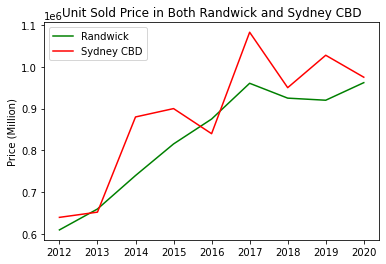

In [12]:
#Compare the trend of unit sold price in both suburbs
label_unit = unit_price.columns.tolist()
var = 0
label_unit.insert(0,var)
unit_value = unit_price.values.tolist()
randwick_unit = unit_value[0]
sydney_unit = unit_value[1]

fig, ax = plt.subplots()
ax.plot(randwick_unit, color = 'green', label = 'Randwick')
ax.plot(sydney_unit, color = 'red', label = 'Sydney CBD')
ax.legend(loc = 'upper left')
plt.title('Unit Sold Price in Both Randwick and Sydney CBD')
plt.ylabel('Price (Million)')
ax.set_xticklabels(label_unit)
plt.show()

In [18]:
!conda install -c conda-forge geocoder --yes
print ("install geocoder")
!conda install -c conda-forge/label/gcc7 geocoder --yes
print ("install geocoder2")
!conda install -c conda-forge/label/cf201901 geocoder --yes
print ("install geocoder3")
!conda install -c conda-forge/label/cf202003 geocoder --yes
print ("install geocoder4")
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         197 KB

The following NEW packages will be INSTALLED:

  geocoder           conda-forge/noarch::geocoder-1.38.1-py_1
  ratelim            conda-forge/noarch::ratelim-0.1.6-py_2

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.4.13-~ --> conda-forge::ca-certificates-2020.1

In [19]:
#Setup Dataframe for Explore and Clustering
d = {'Suburb':['Randwick','Sydney CBD']}
df_suburb = pd.DataFrame(data = d)
df_suburb

,Suburb
0,Randwick
1,Sydney CBD


In [31]:
# Get latitude and longitude of Sydney CBD (Town Hall) and Randwick (UNSW)
address = 'Town Hall NSW'

geolocator = Nominatim(user_agent="nsw_explorer")
location = geolocator.geocode(address)
latitude_cbd = location.latitude
longitude_cbd = location.longitude
print('The geograpical coordinate of Sydney CBD are {}, {}.'.format(latitude_cbd, longitude_cbd))

address = 'UNSW'

geolocator = Nominatim(user_agent="nsw_explorer")
location = geolocator.geocode(address)
latitude_ran = location.latitude
longitude_ran = location.longitude
print('The geograpical coordinate of UNSW are {}, {}.'.format(latitude_ran, longitude_ran))

The geograpical coordinate of Sydney CBD are -33.873567, 151.2068498.
The geograpical coordinate of UNSW are -33.9170154, 151.22518231269635.


In [42]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL for Sydney (Town Hall)
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_cbd, 
    longitude_cbd, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=IBWZ24XZ3ZFYNIKKUMPGMWHM05BZDQNU3L2ORSJPSUSHZBAZ&client_secret=K5QIXCMSVEL4KGRF2F2XPOMXPREUX5CCK0GAITLWRAMOUFYA&v=20180604&ll=-33.873567,151.2068498&radius=500&limit=100'

In [43]:
results = requests.get(url).json()

In [102]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [103]:
venues = results['response']['groups'][0]['items']
    
nearby_venues_cbd = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_cbd =nearby_venues_cbd.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_cbd['venue.categories'] = nearby_venues_cbd.apply(get_category_type, axis=1)

# clean columns
nearby_venues_cbd.columns = [col.split(".")[-1] for col in nearby_venues_cbd.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues_cbd.shape[0]))

100 venues were returned by Foursquare.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [107]:
nearby_venues_cbd_food = nearby_venues_cbd.loc[nearby_venues_cbd['categories'].str.contains('Restaurant')]

In [105]:
#Create Map of Sydney CBD Restaurant Location
map_sydneyfood = folium.Map(location=[latitude_cbd, longitude_cbd], zoom_start=16)

# add markers to map
for lat, lng, name in zip(nearby_venues_cbd_food['lat'], nearby_venues_cbd_food['lng'], nearby_venues_cbd_food['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sydneyfood)  
    
map_sydneyfood

In [108]:
nearby_venues_cbd.loc[(nearby_venues_cbd['categories'].str.contains('Restaurant')),'categories']='Restaurant'
nearby_venues_cbd.loc[(nearby_venues_cbd['categories'].str.contains('Gym')),'categories']='Gym'
nearby_venues_cbd.loc[(nearby_venues_cbd['categories'].str.contains('Pharmacy')),'categories']='Pharmacy'
cbd_info = nearby_venues_cbd[nearby_venues_cbd['categories'].str.contains("Pharmacy") | nearby_venues_cbd['categories'].str.contains('Gym') | nearby_venues_cbd['categories'].str.contains('Restaurant')]
cbd_info.groupby('categories').count()

,name,lat,lng
categories,,,
Gym,4,4,4
Pharmacy,1,1,1
Restaurant,26,26,26


In [110]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL for Randwick (UNSW)
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_ran, 
    longitude_ran, 
    radius, 
    LIMIT)
url # display URL

results = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues_ran = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_ran =nearby_venues_ran.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_ran['venue.categories'] = nearby_venues_ran.apply(get_category_type, axis=1)

# clean columns
nearby_venues_ran.columns = [col.split(".")[-1] for col in nearby_venues_ran.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues_ran.shape[0]))

19 venues were returned by Foursquare.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [114]:
nearby_venues_ran_food = nearby_venues_ran.loc[nearby_venues_ran['categories'].str.contains('Restaurant')]

In [117]:
#Create Map of Randwick Restaurant Location
map_randwickfood = folium.Map(location=[latitude_ran, longitude_ran], zoom_start=16)

# add markers to map
for lat, lng, name in zip(nearby_venues_ran_food['lat'], nearby_venues_ran_food['lng'], nearby_venues_ran_food['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_randwickfood)  
    
map_randwickfood

In [118]:
nearby_venues_ran.loc[(nearby_venues_ran['categories'].str.contains('Restaurant')),'categories']='Restaurant'
nearby_venues_ran.loc[(nearby_venues_ran['categories'].str.contains('Gym')),'categories']='Gym'
nearby_venues_ran.loc[(nearby_venues_ran['categories'].str.contains('Pharmacy')),'categories']='Pharmacy'
randwick_info = nearby_venues_ran[nearby_venues_ran['categories'].str.contains("Pharmacy") | nearby_venues_ran['categories'].str.contains('Gym') | nearby_venues_ran['categories'].str.contains('Restaurant')]
randwick_info.groupby('categories').count()

,name,lat,lng
categories,,,
Restaurant,11,11,11


In [121]:
#End